In [2]:
import pandas as pd

# Load the dataset to explore its structure and identify the contents
file_path = "C:/Users/hussien/OneDrive/Desktop/RTA Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset such as the first few rows, columns, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

(None,
        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
 0  17:02:00      Monday              18-30          Male   Above high school   
 1  17:02:00      Monday              31-50          Male  Junior high school   
 2  17:02:00      Monday              18-30          Male  Junior high school   
 3   1:06:00      Sunday              18-30          Male  Junior high school   
 4   1:06:00      Sunday              18-30          Male  Junior high school   
 
   Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
 0                Employee              1-2yr           Automobile   
 1                Employee         Above 10yr  Public (> 45 seats)   
 2                Employee              1-2yr      Lorry (41?100Q)   
 3                Employee             5-10yr  Public (> 45 seats)   
 4                Employee              2-5yr                  NaN   
 
   Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
 0            

In [4]:

# Check the percentage of missing values per column to decide on the cleaning strategy
missing_data = df.isnull().mean() * 100

# Cleaning: First, let's address some essential time, road, and weather-related columns
# Filling missing values in categorical columns with the mode
columns_to_fill_mode = ['Road_surface_type', 'Road_surface_conditions', 'Weather_conditions', 'Light_conditions']
df[columns_to_fill_mode] = df[columns_to_fill_mode].fillna(df[columns_to_fill_mode].mode().iloc[0])

# Filling missing values in other categorical columns (optional based on relevance)
columns_to_drop_rows = ['Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 
                        'Service_year_of_vehicle', 'Defect_of_vehicle']

# Drop rows with nulls in these columns for cleaner analysis
df_cleaned = df.dropna(subset=columns_to_drop_rows)

# Convert 'Time' into a usable format (extract hour for analysis of time patterns)
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], errors='coerce').dt.hour

# Check cleaned data
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         4835 non-null   int64 
 1   Day_of_week                  4835 non-null   object
 2   Age_band_of_driver           4835 non-null   object
 3   Sex_of_driver                4835 non-null   object
 4   Educational_level            4759 non-null   object
 5   Vehicle_driver_relation      4797 non-null   object
 6   Driving_experience           4835 non-null   object
 7   Type_of_vehicle              4835 non-null   object
 8   Owner_of_vehicle             4835 non-null   object
 9   Service_year_of_vehicle      4835 non-null   object
 10  Defect_of_vehicle            4835 non-null   object
 11  Area_accident_occured        4778 non-null   object
 12  Lanes_or_Medians             4749 non-null   object
 13  Road_allignment              480

C:\Users\hussien\AppData\Local\Temp\ipykernel_13612\1673034880.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], errors='coerce').dt.hour


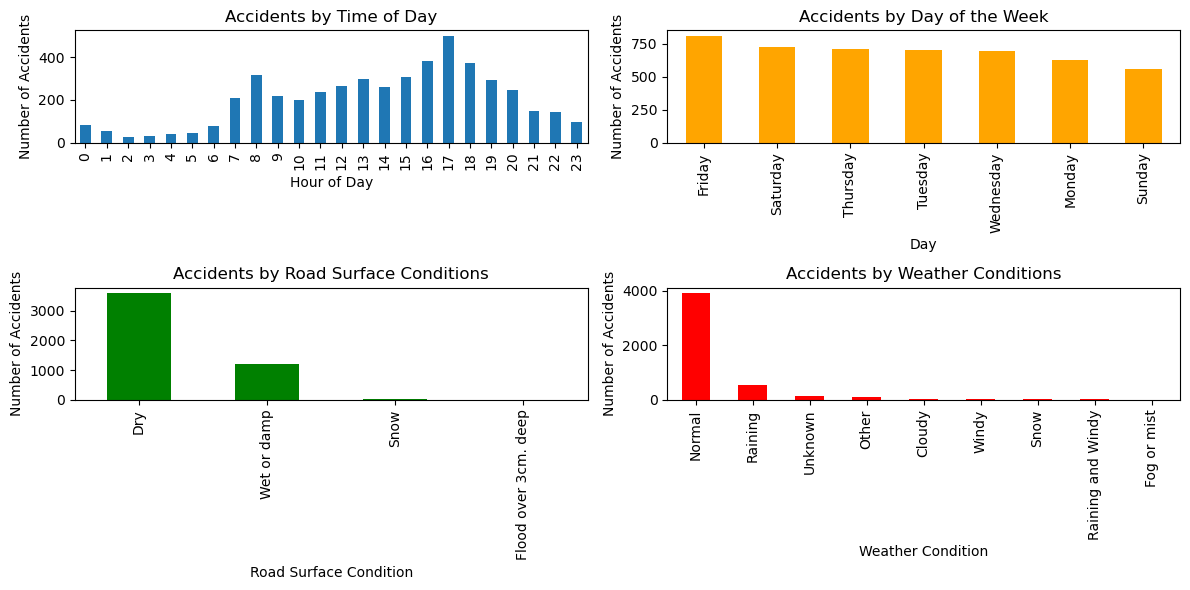

In [5]:
import matplotlib.pyplot as plt

# Set up the size for the plots
plt.figure(figsize=(12, 6))

# 1. Plot distribution of accidents by hour of the day
plt.subplot(2, 2, 1)
df_cleaned['Time'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')

# 2. Plot distribution of accidents by day of the week
plt.subplot(2, 2, 2)
df_cleaned['Day_of_week'].value_counts().plot(kind='bar', color='orange')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')

# 3. Plot accidents based on road surface conditions
plt.subplot(2, 2, 3)
df_cleaned['Road_surface_conditions'].value_counts().plot(kind='bar', color='green')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')

# 4. Plot accidents based on weather conditions
plt.subplot(2, 2, 4)
df_cleaned['Weather_conditions'].value_counts().plot(kind='bar', color='red')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()


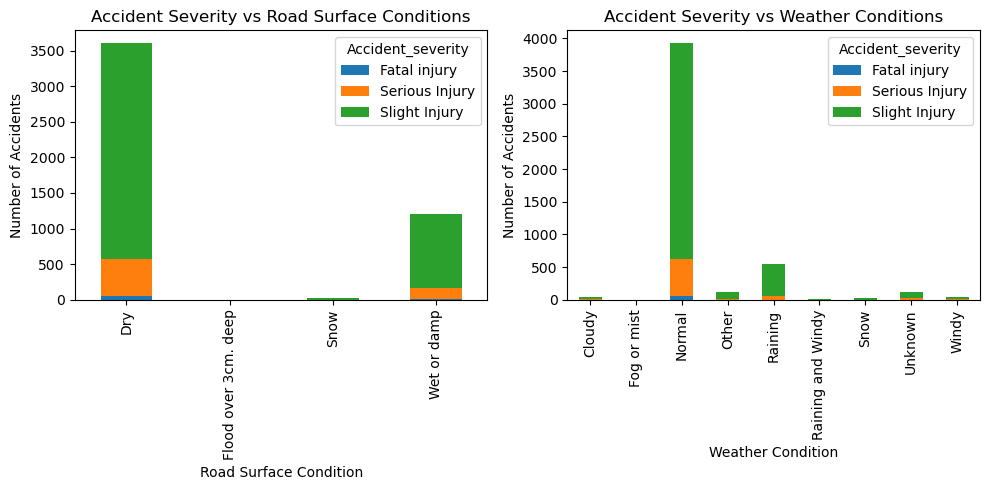

In [6]:
# Let's explore accident severity in relation to road and weather conditions
plt.figure(figsize=(10, 5))

# Plotting Accident Severity vs Road Surface Conditions
plt.subplot(1, 2, 1)
pd.crosstab(df_cleaned['Road_surface_conditions'], df_cleaned['Accident_severity']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Accident Severity vs Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')

# Plotting Accident Severity vs Weather Conditions
plt.subplot(1, 2, 2)
pd.crosstab(df_cleaned['Weather_conditions'], df_cleaned['Accident_severity']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Accident Severity vs Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()


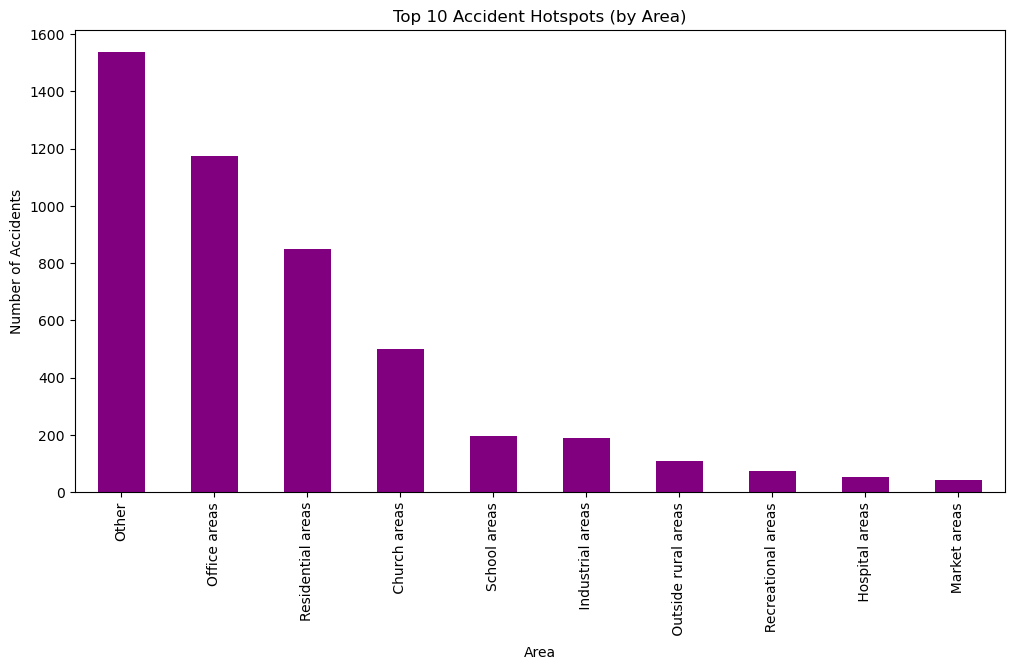

In [7]:
# Plot accident severity across areas where accidents occurred to identify hotspots
plt.figure(figsize=(12, 6))

# Plotting accident hotspots based on 'Area_accident_occured'
df_cleaned['Area_accident_occured'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title('Top 10 Accident Hotspots (by Area)')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')

plt.show()


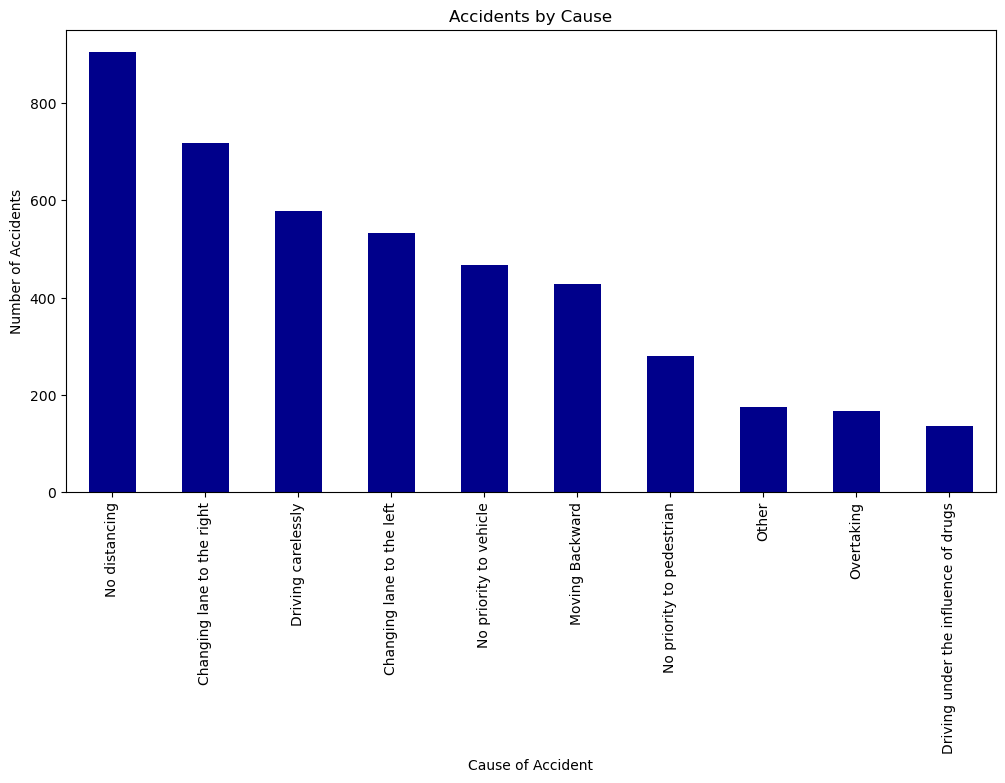

In [8]:
# Plot accident trends based on cause of accidents
plt.figure(figsize=(12, 6))

# Group by cause of accident and count the number of accidents
df_cleaned['Cause_of_accident'].value_counts().nlargest(10).plot(kind='bar', color='darkblue')

plt.title('Accidents by Cause')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')

plt.show()


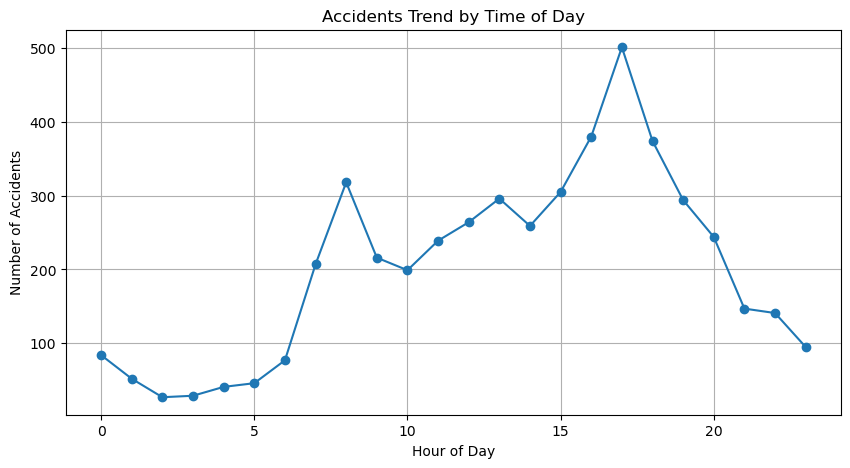

In [9]:
# First, we need to aggregate the accident data by date (since we only have 'Time', we'll assume the same date for all accidents)
# Assuming we have only the 'Time' column, we'll simulate daily data by grouping on Time and using it as the proxy for daily trends.

# Group by time of day (hour) and count the number of accidents to simulate a time series
accidents_by_time = df_cleaned.groupby('Time').size()

# Plot the aggregated data (accidents by time)
plt.figure(figsize=(10, 5))
accidents_by_time.plot(kind='line', marker='o')
plt.title('Accidents Trend by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# This is a simple way to visualize the trend. If you have a real time-based index (like days or months),
# we could make more precise predictions. But let's start with time-based trends to understand the data.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Selecting relevant features for the model
features = ['Time', 'Day_of_week', 'Road_surface_type', 'Road_surface_conditions', 
            'Weather_conditions', 'Light_conditions', 'Number_of_vehicles_involved', 
            'Number_of_casualties']

# Preprocessing: Encode categorical features
df_encoded = df_cleaned[features + ['Accident_severity']].copy()

# Encoding categorical features
label_encoder = LabelEncoder()
for col in features + ['Accident_severity']:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Defining X and y
X = df_encoded[features]
y = df_encoded['Accident_severity']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix


('              precision    recall  f1-score   support\n\n           0       0.40      0.25      0.31         8\n           1       0.54      0.30      0.38       142\n           2       0.88      0.95      0.92       817\n\n    accuracy                           0.85       967\n   macro avg       0.61      0.50      0.54       967\nweighted avg       0.83      0.85      0.83       967\n',
 array([[  2,   1,   5],
        [  1,  42,  99],
        [  2,  35, 780]], dtype=int64))

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'df_cleaned' is your cleaned dataset

# Selecting relevant features for the model
features = ['Time', 'Day_of_week', 'Road_surface_type', 'Road_surface_conditions', 
            'Weather_conditions', 'Light_conditions', 'Number_of_vehicles_involved', 
            'Number_of_casualties']

# Preprocessing: Encode categorical features
df_encoded = df_cleaned[features + ['Accident_severity']].copy()

# Encoding categorical features
label_encoder = LabelEncoder()
for col in features + ['Accident_severity']:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Defining X and y
X = df_encoded[features]
y = df_encoded['Accident_severity']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.54      0.30      0.38       142
           2       0.88      0.95      0.92       817

    accuracy                           0.85       967
   macro avg       0.61      0.50      0.54       967
weighted avg       0.83      0.85      0.83       967

Confusion Matrix:
 [[  2   1   5]
 [  1  42  99]
 [  2  35 780]]
